# KNN Macro Classification
- 아이리스 데이터를 이용해서 세 종류의 꽃을 다중 분류

1. 데이터 준비

In [1]:
# !wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/iris.csv

--2024-07-06 23:27:55--  https://raw.githubusercontent.com/devdio/flyai_datasets/main/iris.csv
raw.githubusercontent.com (raw.githubusercontent.com) 해석 중... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
다음으로 연결 중: raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 200 OK
길이: 3858 (3.8K) [text/plain]
저장 위치: `iris.csv'

iris.csv            100%[===================>]   3.77K  --.-KB/s    /  0s      

2024-07-06 23:27:56 (21.1 MB/s) - `iris.csv' 저장함 [3858/3858]



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
iris = pd.read_csv('iris.csv')
iris

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
iris.shape

(150, 5)

In [5]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df = iris.copy()

In [7]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
idx_train = int(len(df) * 0.8)
idx_var = int(len(df) * 0.2)
idx_train, idx_var

(120, 30)

In [10]:
df = df.sample(frac=1)
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
40,5.0,3.5,1.3,0.3,setosa
26,5.0,3.4,1.6,0.4,setosa
128,6.4,2.8,5.6,2.1,virginica
59,5.2,2.7,3.9,1.4,versicolor
21,5.1,3.7,1.5,0.4,setosa
...,...,...,...,...,...
69,5.6,2.5,3.9,1.1,versicolor
25,5.0,3.0,1.6,0.2,setosa
72,6.3,2.5,4.9,1.5,versicolor
24,4.8,3.4,1.9,0.2,setosa


In [11]:
train = df.iloc[:idx_train,:]
var = df.iloc[idx_train:,:]
train, var # 테스트 데이터 없이 8:2 로만 분류

(     Sepal Length  Sepal Width  Petal Length  Petal Width     Species
 40            5.0          3.5           1.3          0.3      setosa
 26            5.0          3.4           1.6          0.4      setosa
 128           6.4          2.8           5.6          2.1   virginica
 59            5.2          2.7           3.9          1.4  versicolor
 21            5.1          3.7           1.5          0.4      setosa
 ..            ...          ...           ...          ...         ...
 142           5.8          2.7           5.1          1.9   virginica
 130           7.4          2.8           6.1          1.9   virginica
 144           6.7          3.3           5.7          2.5   virginica
 57            4.9          2.4           3.3          1.0  versicolor
 95            5.7          3.0           4.2          1.2  versicolor
 
 [120 rows x 5 columns],
      Sepal Length  Sepal Width  Petal Length  Petal Width     Species
 139           6.9          3.1           5.4     

In [12]:
X_train = train.drop('Species', axis=1)
y_train = train['Species']
X_var = var.drop('Species', axis=1)
y_var = var['Species']
X_train, y_train, X_var, y_var

(     Sepal Length  Sepal Width  Petal Length  Petal Width
 40            5.0          3.5           1.3          0.3
 26            5.0          3.4           1.6          0.4
 128           6.4          2.8           5.6          2.1
 59            5.2          2.7           3.9          1.4
 21            5.1          3.7           1.5          0.4
 ..            ...          ...           ...          ...
 142           5.8          2.7           5.1          1.9
 130           7.4          2.8           6.1          1.9
 144           6.7          3.3           5.7          2.5
 57            4.9          2.4           3.3          1.0
 95            5.7          3.0           4.2          1.2
 
 [120 rows x 4 columns],
 40         setosa
 26         setosa
 128     virginica
 59     versicolor
 21         setosa
           ...    
 142     virginica
 130     virginica
 144     virginica
 57     versicolor
 95     versicolor
 Name: Species, Length: 120, dtype: object,
      Sepal 

In [13]:
u = X_train.mean(); u

Sepal Length    5.863333
Sepal Width     3.045833
Petal Length    3.780000
Petal Width     1.201667
dtype: float64

In [14]:
s = X_train.std(); s

Sepal Length    0.849313
Sepal Width     0.449069
Petal Length    1.777573
Petal Width     0.752250
dtype: float64

In [15]:
X_train = (X_train - u) / s
X_var = (X_var - u) / s
X_train, X_var

(     Sepal Length  Sepal Width  Petal Length  Petal Width
 40      -1.016507     1.011351     -1.395161    -1.198627
 26      -1.016507     0.788668     -1.226391    -1.065692
 128      0.631883    -0.547429      1.023868     1.194196
 59      -0.781023    -0.770111      0.067508     0.263654
 21      -0.898765     1.456717     -1.282648    -1.065692
 ..            ...          ...           ...          ...
 142     -0.074570    -0.770111      0.742586     0.928327
 130      1.809305    -0.547429      1.305151     0.928327
 144      0.985109     0.565985      1.080125     1.725934
 57      -1.134249    -1.438160     -0.270031    -0.268085
 95      -0.192312    -0.102063      0.236277    -0.002216
 
 [120 rows x 4 columns],
      Sepal Length  Sepal Width  Petal Length  Petal Width
 139      1.220594     0.120620      0.911355     1.194196
 135      2.162531    -0.102063      1.305151     1.460065
 2       -1.369734     0.343303     -1.395161    -1.331561
 114     -0.074570    -0.5474

In [16]:
df['Species'].head(10)

40         setosa
26         setosa
128     virginica
59     versicolor
21         setosa
99     versicolor
137     virginica
15         setosa
120     virginica
81     versicolor
Name: Species, dtype: object

In [18]:
label_dict = {'setosa': 0, 'virginica': 1, 'versicolor': 2} # 이번에도 역시 라벨 인코딩; 원-핫은 뒤에서 다룰 예정

In [19]:
y_train = y_train.map(label_dict)
y_var = y_var.map(label_dict)
y_train, y_var

(40     0
 26     0
 128    1
 59     2
 21     0
       ..
 142    1
 130    1
 144    1
 57     2
 95     2
 Name: Species, Length: 120, dtype: int64,
 139    1
 135    1
 2      0
 114    1
 149    1
 115    1
 85     2
 23     0
 4      0
 70     2
 9      0
 27     0
 138    1
 16     0
 126    1
 65     2
 71     2
 100    1
 113    1
 46     0
 42     0
 134    1
 19     0
 77     2
 67     2
 69     2
 25     0
 72     2
 24     0
 73     2
 Name: Species, dtype: int64)

In [20]:
X_train = X_train.to_numpy()
X_var = X_var.to_numpy()
y_train = y_train.to_numpy()
y_var = y_var.to_numpy()
X_train, X_var, y_train, y_var

(array([[-1.01650732e+00,  1.01135114e+00, -1.39516094e+00,
         -1.19862688e+00],
        [-1.01650732e+00,  7.88668317e-01, -1.22639147e+00,
         -1.06569229e+00],
        [ 6.31882926e-01, -5.47428596e-01,  1.02386811e+00,
          1.19419573e+00],
        [-7.81022995e-01, -7.70111415e-01,  6.75077874e-02,
          2.63653603e-01],
        [-8.98765155e-01,  1.45671677e+00, -1.28264796e+00,
         -1.06569229e+00],
        [-1.92312195e-01, -5.47428596e-01,  1.80020766e-01,
          1.30719013e-01],
        [ 6.31882926e-01,  1.20619860e-01,  9.67611620e-01,
          7.95391962e-01],
        [-1.92312195e-01,  3.01549651e+00, -1.28264796e+00,
         -1.06569229e+00],
        [ 1.22059373e+00,  3.43302679e-01,  1.08012460e+00,
          1.46006491e+00],
        [-4.27796515e-01, -1.43815987e+00, -4.50051916e-02,
         -2.68084756e-01],
        [ 2.16253101e+00, -9.92794234e-01,  1.75520247e+00,
          1.46006491e+00],
        [-7.81022995e-01,  7.88668317e-01, 

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
y_pred = clf.predict(X_var)
y_pred

array([1, 1, 0, 1, 1, 1, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 2, 0, 1, 0, 2])

In [24]:
y_var

array([1, 1, 0, 1, 1, 1, 2, 0, 0, 2, 0, 0, 1, 0, 1, 2, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 2, 0, 2, 0, 2])

In [25]:
(y_pred == y_var).mean()

0.9

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
cfm = confusion_matrix(y_var, y_pred)
cfm

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  2,  7]])

[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'True')]

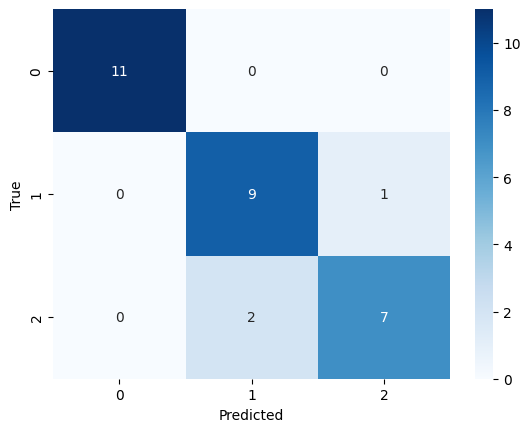

In [28]:
s = sns.heatmap(cfm, annot=True, fmt='d', cmap='Blues')
s.set(xlabel='Predicted', ylabel='True')

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [30]:
# 단순히 정확도가 진짜 정확도의 지표가 될 수는 없음.

# 전체 정확도: accuracy
# 맞았다고 생각하고 고른 것 중에서 진짜 맞는 경우의 비율: precision
# 실제로 맞는 것 중에 맞았다고 고른 경우의 비율: recall
# precision과 recall의 조화 평균. 이게 낮게 나온다는 건 데이터가 불균형하다는 것을 의미

print('accuracy: ', accuracy_score(y_var, y_pred).round(2))
print('precision: ', precision_score(y_var, y_pred, average='macro').round(2))
print('recall: ', recall_score(y_var, y_pred, average='macro').round(2))
print('f1-score: ', f1_score(y_var, y_pred, average='macro').round(2))

accuracy:  0.9
precision:  0.9
recall:  0.89
f1-score:  0.89
